In [1]:
import pandas as pd
import json

In [5]:
# Load the JSON file
with open("../data/playback_data/PlaybackError_Hourly.json", "r") as f:
    data = json.load(f)

In [6]:
# Convert JSON to DataFrame
df = pd.DataFrame(data)

In [7]:
# Convert timestamps to datetime
df["context_time"] = pd.to_datetime(df["context_time"], unit="ms")
df["context_receiver_service_timestamp"] = pd.to_datetime(df["context_receiver_service_timestamp"], unit="ms")

In [8]:
# Calculate Latency (Time delay between client and server logs)
df["latency"] = (df["context_receiver_service_timestamp"] - df["context_time"]).dt.total_seconds()

In [ ]:
df

# **Playback Errors Over Time**
- Visualizing errors per hour/day/week to see trends.
- Checking for spikes.

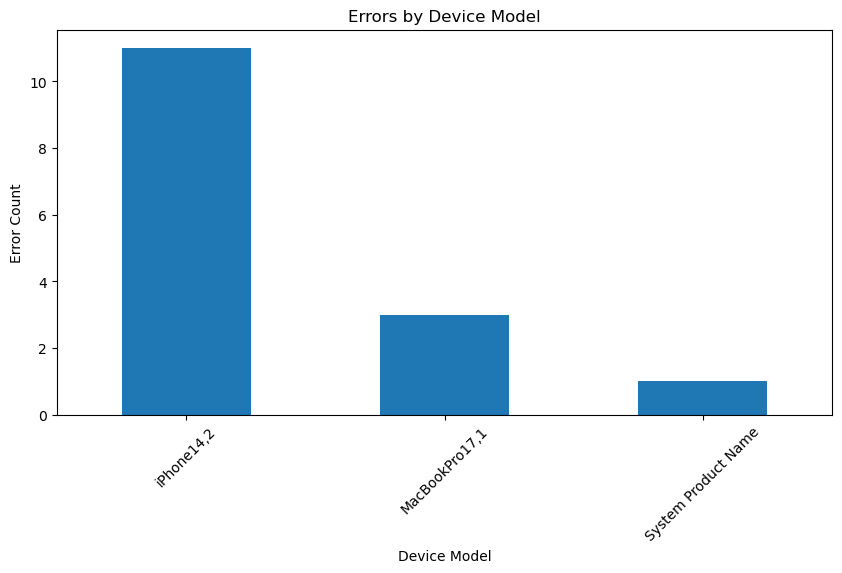

In [12]:
device_errors = df["context_device_model"].value_counts()

plt.figure(figsize=(10, 5))
device_errors.plot(kind="bar")
plt.xlabel("Device Model")
plt.ylabel("Error Count")
plt.title("Errors by Device Model")
plt.xticks(rotation=45)
plt.show()

In [10]:
import matplotlib.pyplot as plt

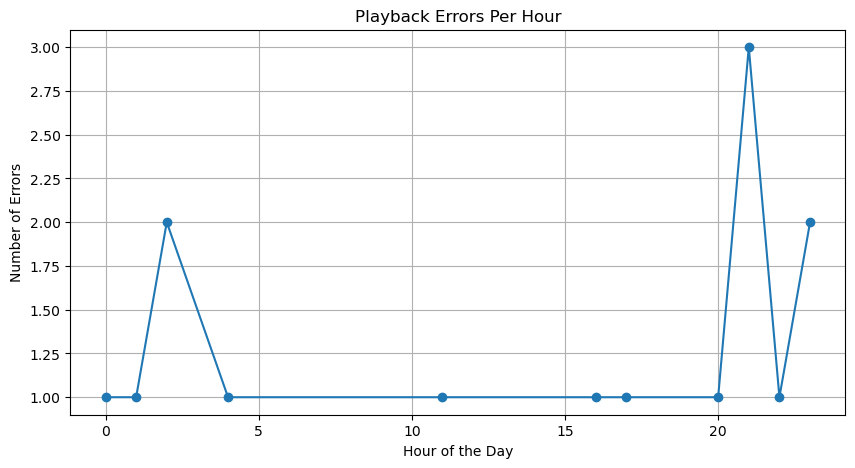

In [11]:
df["hour"] = df["context_time"].dt.hour  # Extract hour of the day
error_counts = df.groupby("hour").size()

plt.figure(figsize=(10, 5))
plt.plot(error_counts.index, error_counts.values, marker="o")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Errors")
plt.title("Playback Errors Per Hour")
plt.grid()
plt.show()

In [18]:
# Filter errors during peak hours (1 AM - 2 AM and 8 PM - 9 PM)
peak_hours = df[df["hour"].isin([1, 2, 8, 9])]

# Count occurrences of each device model during those times
device_counts = peak_hours["context_device_model"].value_counts()

# Display results
print("Devices with Playback Errors During Peak Hours:")
print(device_counts)


Devices with Playback Errors During Peak Hours:
context_device_model
MacBookPro17,1    2
iPhone14,2        1
Name: count, dtype: int64


### Possible Causes
- **Late-night errors** may be due to **network issues or system updates**.
- **Evening errors** could be linked to **high internet usage or device switching**.

---

# **Fatal vs. Non-Fatal Errors**

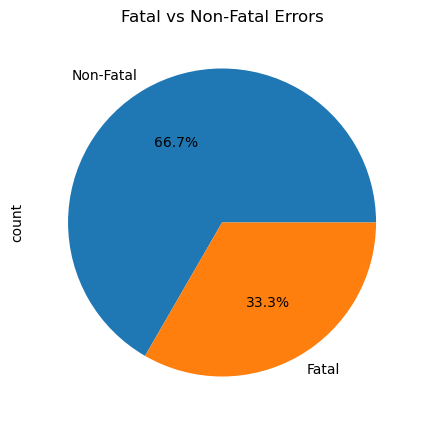

In [13]:
fatal_counts = df["message_fatal"].value_counts()

plt.figure(figsize=(5, 5))
fatal_counts.plot(kind="pie", autopct="%1.1f%%", labels=["Non-Fatal", "Fatal"])
plt.title("Fatal vs Non-Fatal Errors")
plt.show()

### Overview
- **66.7% of playback errors were non-fatal**, meaning they did not cause a complete failure.
- **33.3% were fatal errors**, which likely required restarting the playback or app.

- Most errors were **recoverable**, suggesting temporary issues like buffering or connection drops.
- Fatal errors may be linked to **device issues, app crashes, or corrupt files**.

# **Bitrate and Audio Codec Analysis**
    - Do certain bitrates fail more often?
    - Which audio codecs had errors?

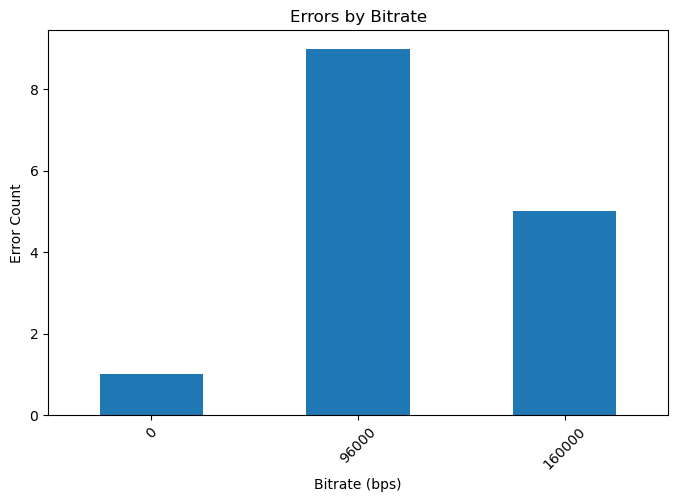

In [14]:
bitrate_errors = df.groupby("message_bitrate").size()

plt.figure(figsize=(8, 5))
bitrate_errors.plot(kind="bar")
plt.xlabel("Bitrate (bps)")
plt.ylabel("Error Count")
plt.title("Errors by Bitrate")
plt.xticks(rotation=45)
plt.show()

# **Track Specific Errors**
    - Does a particular track ID have multiple errors?

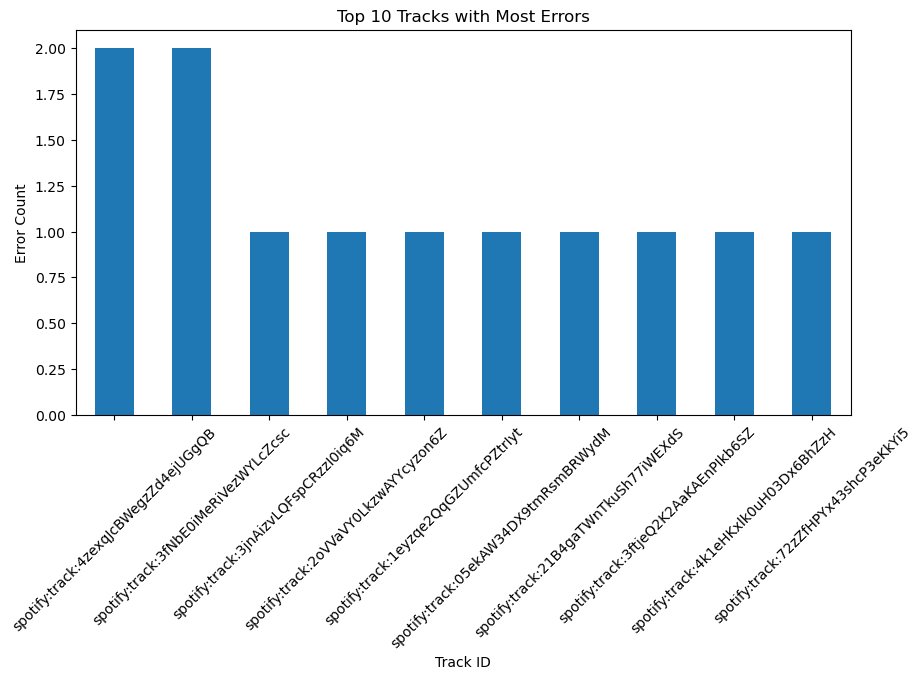

In [15]:
track_errors = df["message_track_id"].value_counts().head(10)

plt.figure(figsize=(10, 5))
track_errors.plot(kind="bar")
plt.xlabel("Track ID")
plt.ylabel("Error Count")
plt.title("Top 10 Tracks with Most Errors")
plt.xticks(rotation=45)
plt.show()

# **Latency Analysis**

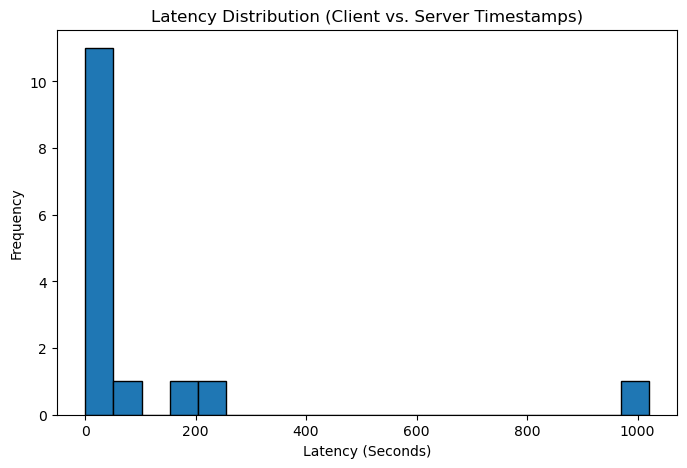

In [16]:
plt.figure(figsize=(8, 5))
plt.hist(df["latency"], bins=20, edgecolor="black")
plt.xlabel("Latency (Seconds)")
plt.ylabel("Frequency")
plt.title("Latency Distribution (Client vs. Server Timestamps)")
plt.show()